In [1]:
import sys
sys.path.insert(1, "../")
import numpy as np
import scipy
import matplotlib.pyplot as plt
import interval
import tensorflow.keras as keras
import nn_reachability
%load_ext autoreload
%autoreload 2

In [2]:
def F_car(x,p):

    power = 0.0015

    min_action, max_action = -1., 1.
    min_position, max_position = -1.2, 0.6
    max_speed = 0.07

    position = x[0]
    velocity = x[1]
    
    #Careful, p index
    force = min(max(p, min_action), max_action)

    velocity += force * power - 0.0025 * np.cos(3 * position)
    if velocity > max_speed:
        velocity = max_speed
    if velocity < -max_speed:
        velocity = -max_speed
    position += velocity
    if position > max_position:
        position = max_position
    if position < min_position:
        position = min_position
    if position == min_position and velocity < 0:
        velocity = 0

    return position, velocity

In [3]:
Lx = np.array([[0, 0], [0.0075, 0]])
Lp = np.array([0,0]).T

In [4]:
def g_func(F, x, x_hat, p, p_hat, Lx, Lp):

    xi = np.where(Lx >= 0, np.repeat([x], Lx.shape[0], axis=0), np.repeat([x_hat], Lx.shape[0], axis=0))
    pi = np.where(Lp >= 0, np.repeat(p, Lp.shape[0], axis=0), np.repeat(p_hat, Lp.shape[0], axis=0))

    ret_g = np.zeros(x.shape[0])

    print(ret_g.shape[0])

    for i in range(ret_g.shape[0]):
        #careful, dot product
        f = F(xi[i], pi[i])[i]
        ret_g[i] = f + np.abs(Lx[i]).dot(x-x_hat) + np.abs(Lp[i])*(p-p_hat)[0]


    return ret_g

    

In [5]:
def interval_approximation(T, model, F, state_interval, input_interval, Lx, Lp):

    for i in range(T):
        print(i)
        
        x_min, x_max = state_interval.high_low()
        p_min, p_max = input_interval.high_low()
        
        state_interval = interval.create_interval([g_func(F, x_min, x_max, p_min, p_max, Lx, Lp), g_func(F, x_max, x_min, p_min, p_max, Lx, Lp)])
        ax_state = nn_reachability.plot_interval(state_interval, 0, 1)
        plt.show()
        low, high = state_interval.high_low()
        print("finished system reachability")
        H = np.concatenate([np.linspace(low[0], high[0], 5000).reshape(5000,1), np.linspace(low[1], high[1], 5000).reshape(5000,1)], axis=1)
        input_interval = nn_reachability.reachMLP(model, H, 0.01, 1000, output_y=0)

    return state_interval

In [6]:
state_interval = interval.Interval(interval = [(-0.6, -0.4), (0, 0)])
action_interval = interval.Interval(interval=[(-0.5,0.5)])

In [7]:
model = keras.models.load_model("../ddpg/models/car_actor.tf")

0
2
2


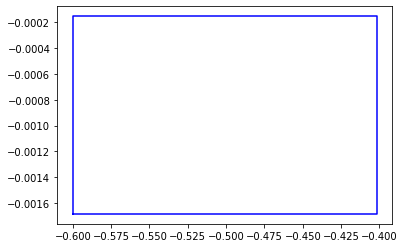

finished system reachability
[[-0.94507456]
 [-0.96651655]
 [-0.98066205]
 [-0.9646644 ]
 [-0.9027295 ]
 [-0.83467954]
 [-0.96654856]
 [-0.94749534]
 [-0.9490854 ]
 [-0.96236116]
 [-0.90223205]
 [-0.94993794]
 [-0.9674068 ]
 [-0.9493046 ]
 [-0.75876445]
 [-0.8895328 ]
 [-0.9812799 ]
 [-0.95987606]
 [-0.90401334]
 [-0.9704007 ]
 [-0.96333826]
 [-0.95520943]
 [-0.952379  ]
 [-0.94633675]
 [-0.9459347 ]
 [-0.9618235 ]
 [-0.9533709 ]
 [-0.9541931 ]
 [-0.94177747]
 [-0.9580258 ]
 [-0.8667459 ]
 [-0.946167  ]
 [-0.94641376]
 [-0.9487035 ]
 [-0.7926751 ]
 [-0.966276  ]
 [-0.96066517]
 [-0.941106  ]
 [-0.94822955]
 [-0.9597366 ]
 [-0.9550672 ]
 [-0.95225185]
 [-0.9532291 ]
 [-0.94788617]
 [-0.965193  ]
 [-0.7815079 ]
 [-0.96195585]
 [-0.9410447 ]
 [-0.95850813]
 [-0.9511375 ]
 [-0.9515842 ]
 [-0.9549504 ]
 [-0.9647257 ]
 [-0.96447617]
 [-0.96316963]
 [-0.9238257 ]
 [-0.93678725]
 [-0.79473084]
 [-0.9107429 ]
 [-0.96331865]
 [-0.9106514 ]
 [-0.9636571 ]
 [-0.7343718 ]
 [-0.9651727 ]
 [-0.956470

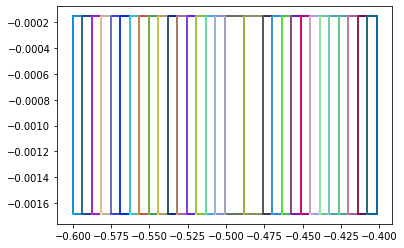

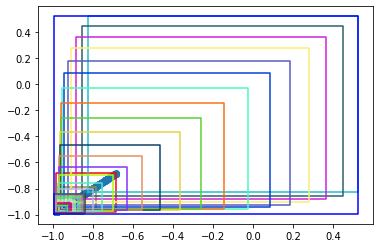

1
2
2


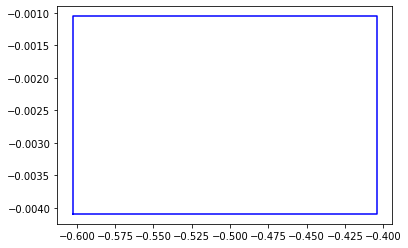

finished system reachability
[[-0.9668552 ]
 [-0.97327596]
 [-0.951113  ]
 [-0.9580568 ]
 [-0.94772094]
 [-0.9660761 ]
 [-0.95977825]
 [-0.96051   ]
 [-0.9592992 ]
 [-0.96074003]
 [-0.96716595]
 [-0.96398485]
 [-0.95809466]
 [-0.96848476]
 [-0.95335567]
 [-0.9684072 ]
 [-0.96015406]
 [-0.9595482 ]
 [-0.96563303]
 [-0.9619901 ]
 [-0.96079   ]
 [-0.9603614 ]
 [-0.96171135]
 [-0.9581919 ]
 [-0.9587504 ]
 [-0.9677183 ]
 [-0.95503396]
 [-0.96236134]
 [-0.96666217]
 [-0.95797294]
 [-0.970258  ]
 [-0.9588822 ]
 [-0.9598522 ]
 [-0.9605583 ]
 [-0.97031415]
 [-0.96468574]
 [-0.96799433]
 [-0.97050637]
 [-0.973584  ]
 [-0.96787333]
 [-0.9606694 ]
 [-0.9590183 ]
 [-0.9721016 ]
 [-0.9460538 ]
 [-0.96666217]
 [-0.971991  ]
 [-0.97101647]
 [-0.9668621 ]
 [-0.95991224]
 [-0.9578609 ]
 [-0.96556103]
 [-0.9611106 ]
 [-0.9734895 ]
 [-0.9610655 ]
 [-0.9460538 ]
 [-0.9547828 ]
 [-0.96025294]
 [-0.9613015 ]
 [-0.9617379 ]
 [-0.9615029 ]
 [-0.9619122 ]
 [-0.96231425]
 [-0.9544191 ]
 [-0.95866024]
 [-0.964594

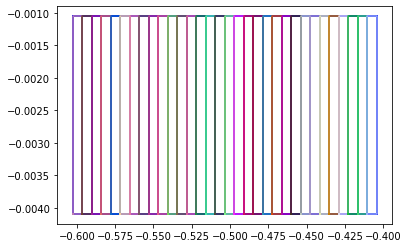

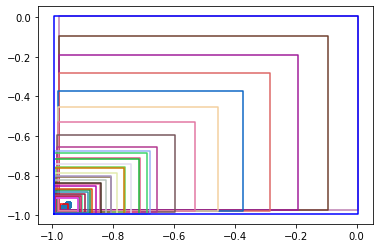

In [8]:
state_interval = interval_approximation(2, model, F_car, state_interval, action_interval, Lx, Lp)